In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/AI_stylist


archive.zip


In [ ]:
import zipfile
zip_path = "/content/drive/MyDrive/AI_stylist/archive.zip"
extract_path = "/content/ai_stylist_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [ ]:
!ls /content/ai_stylist_data


images	myntradataset  styles.csv


In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/ai_stylist_data/styles.csv",encoding='utf-8', on_bad_lines='skip')
df=pd.DataFrame(data)
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
print("Columns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
                 id          year
count  44424.000000  44423.000000
mean   29696.334301   2012.806497
std    17049.490518      2.126480
min     1163.000000   2007.000000
25%    14768.750000   2011.000000
50%    28618.500000   2012.000000
75%    44683.250000   2015.000000
max    60000.000000   2019.000000


In [ ]:
# Overview of the dataset

print("\nOverview of the dataset:")
print(df.info())


Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB
None


In [ ]:
# Check for null values

print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


In [ ]:
# Check for duplicates

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


In [ ]:
# Check unique values in columns

print("\nUnique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")


Unique values in each column:
id: 44424
gender: 5
masterCategory: 7
subCategory: 45
articleType: 143
baseColour: 46
season: 4
year: 13
usage: 8
productDisplayName: 31121


In [ ]:
# Most common article types
article_counts = df['articleType'].value_counts()

print("\nMost common article types:")
print(article_counts.head(10))



Most common article types:
articleType
Tshirts         7067
Shirts          3217
Casual Shoes    2845
Watches         2542
Sports Shoes    2036
Kurtas          1844
Tops            1762
Handbags        1759
Heels           1323
Sunglasses      1073
Name: count, dtype: int64


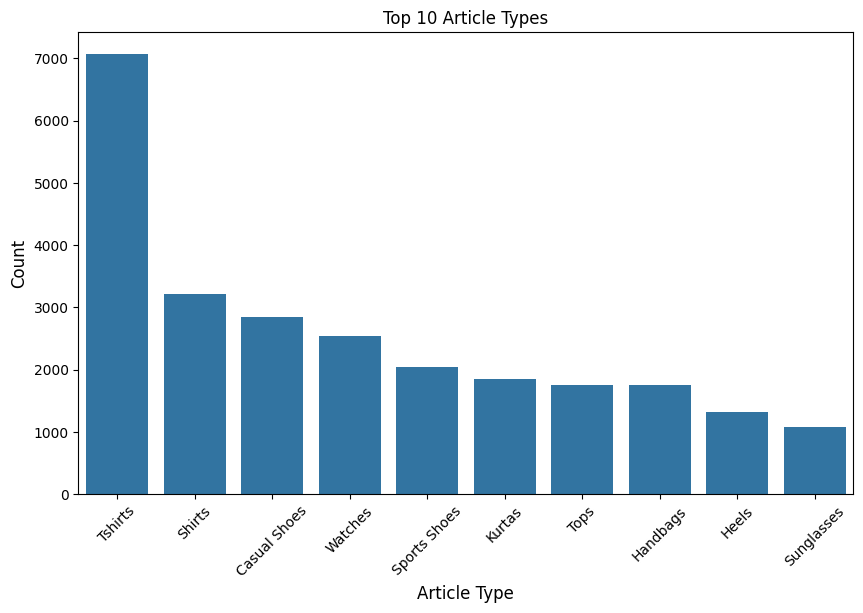

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of article types
plt.figure(figsize=(10, 6))
sns.barplot(x=article_counts.index[:10], y=article_counts.values[:10])
plt.title("Top 10 Article Types")
plt.xlabel('Article Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Count the number of products per category

product_counts = df['productDisplayName'].value_counts()

print("\nNumber of products per category:")
print(product_counts.head(10))






Number of products per category:
productDisplayName
Lucera Women Silver Earrings              82
Lucera Women Silver Pendant               56
Lucera Women Silver Ring                  50
Catwalk Women Black Heels                 48
Q&Q Men Black Dial Watch                  42
Fastrack Men Black Dial Watch             41
Maxima Men White Dial Watch               38
Fabindia Women Anusuya Silver Earrings    37
FNF Multi Coloured Printed Sari           32
Coolers Men Black Sandals                 31
Name: count, dtype: int64


<ipython-input-15-bd2c1cc529c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


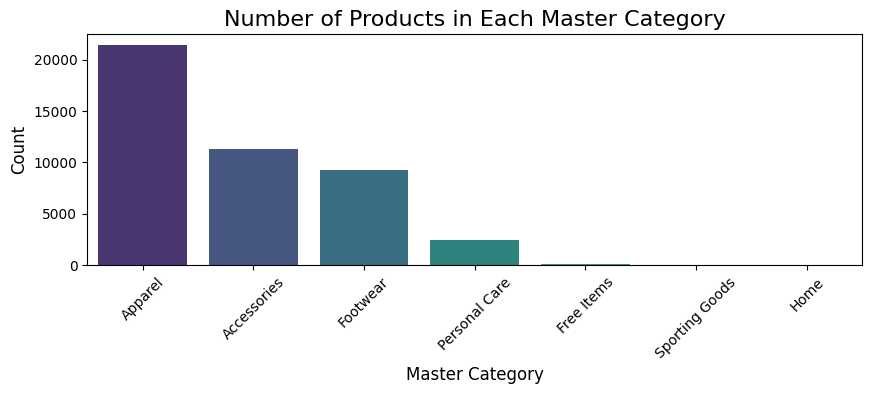

In [ ]:
# Count the number of products per category
category_counts = df['masterCategory'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 3))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Number of Products in Each Master Category', fontsize=16)
plt.xlabel('Master Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Aggregate data by year


df['year'] = pd.to_datetime(df['year'], format='%Y')
yearly_counts = df.groupby('year').size()



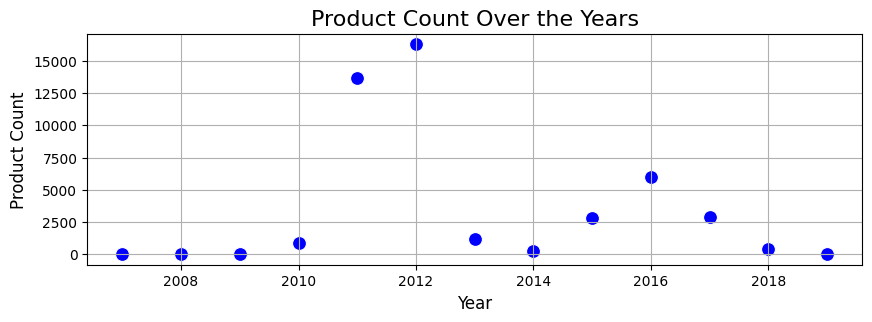

In [ ]:
# Aggregate data by year
year_counts = df.groupby('year').size().reset_index(name='product_count')

# Plot the scatter plot
plt.figure(figsize=(10, 3))
sns.scatterplot(data=year_counts, x='year', y='product_count', color='blue', s=100)
plt.title('Product Count Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Product Count', fontsize=12)
plt.grid(True)
plt.show()


          year            articleType  count
0   2007-01-01           Casual Shoes      1
5   2008-01-01           Sports Shoes      2
8   2009-01-01           Casual Shoes      5
57  2010-01-01                Tshirts    351
117 2011-01-01                Tshirts   4164
213 2012-01-01                Tshirts   2298
229 2013-01-01           Casual Shoes    233
264 2014-01-01                    Bra     76
307 2015-01-01               Handbags    631
399 2016-01-01                Watches   2479
442 2017-01-01  Perfume and Body Mist    613
458 2018-01-01           Casual Shoes    175
475 2019-01-01               Lipstick     10


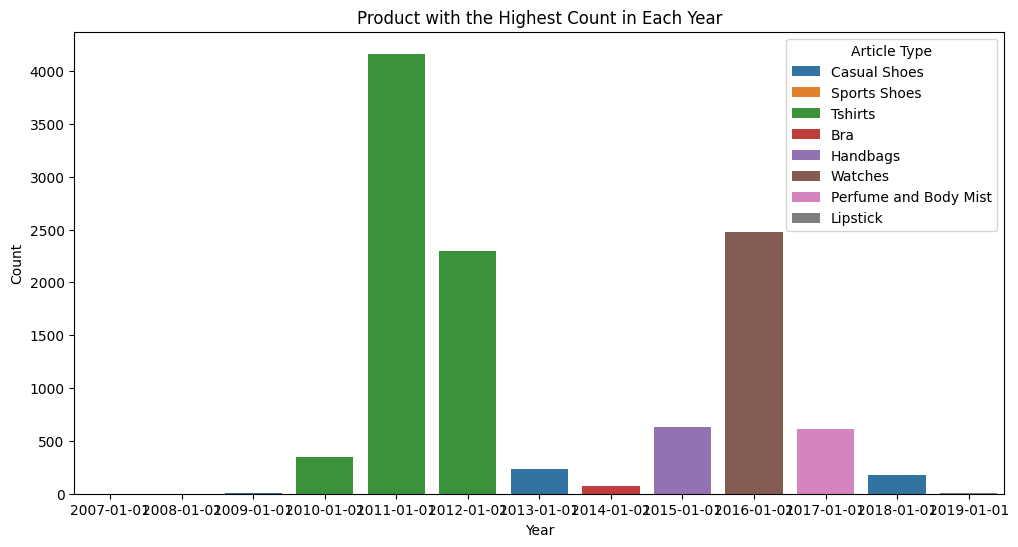

In [ ]:
# Convert year to integer, handling missing values if any
# df['year'] = df['year'].astype('Int64')
# 1. Group by Year and Product Type:
product_counts = df.groupby(['year', 'articleType']).size().reset_index(name='count')
# 2. Find the Product with the Highest Count in Each Year:
highest_product_per_year = product_counts.loc[product_counts.groupby('year')['count'].idxmax()]
# 3. Display the Results:
print(highest_product_per_year)
# visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='count', hue='articleType', data=highest_product_per_year)
plt.title('Product with the Highest Count in Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Article Type')
plt.show()

<ipython-input-19-5939a0d17404>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='pastel')


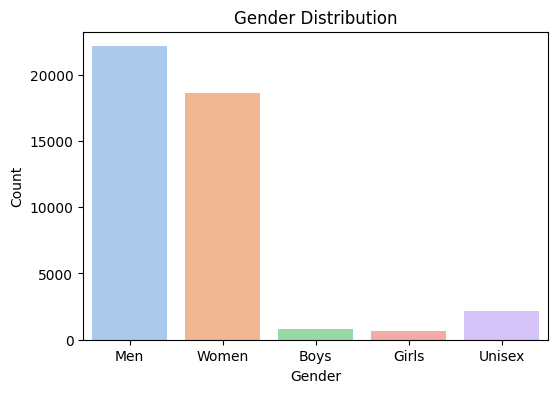

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


<ipython-input-20-4ee42a21dc2a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_colors.index, y=top_colors.values, palette='viridis')


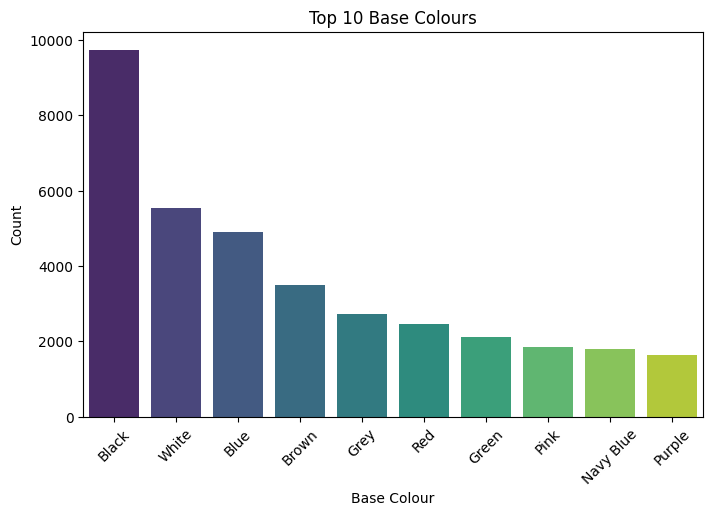

In [ ]:
# Top 10 most common baseColours
top_colors = df['baseColour'].value_counts().head(10)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_colors.index, y=top_colors.values, palette='viridis')
plt.title('Top 10 Base Colours')
plt.xlabel('Base Colour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-21-4a589d2bcb76>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='season', palette='coolwarm')


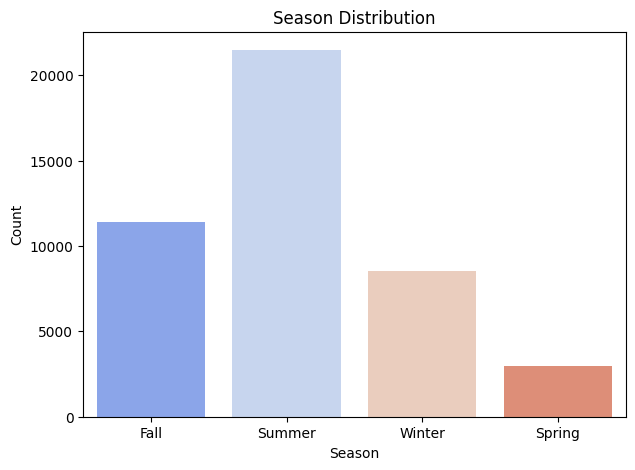

In [ ]:
# Count plot for season
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='season', palette='coolwarm')
plt.title('Season Distribution')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()


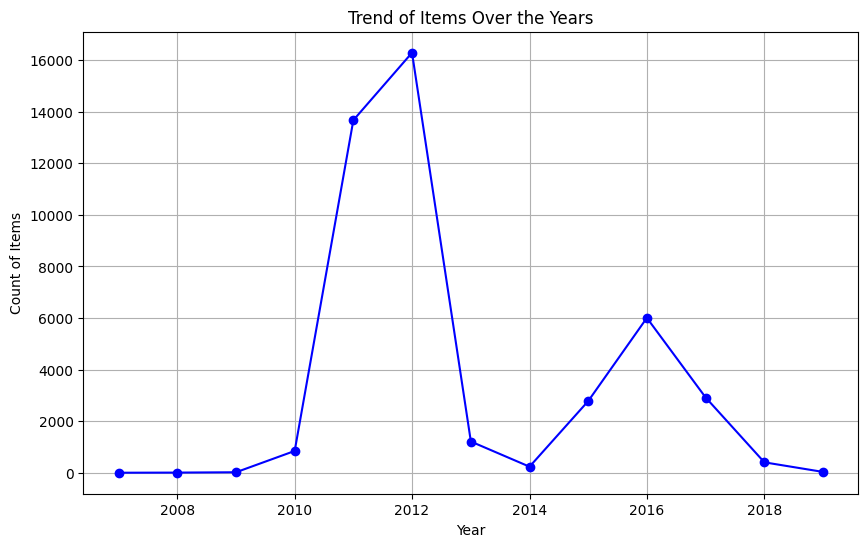

In [ ]:
# Group by year and count
yearly_count = df['year'].value_counts().sort_index()

# Line plot for year trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_count.index, yearly_count.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Items Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Items')
plt.grid(True)
plt.show()


<ipython-input-23-a3e6b7c6ae13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='usage', palette='husl')


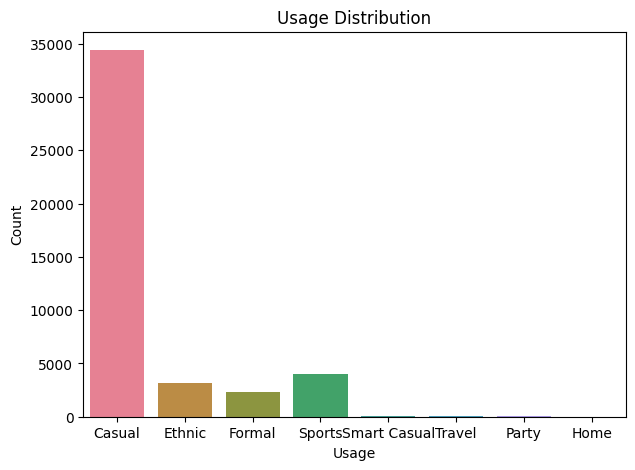

In [ ]:
# Count plot for usage
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='usage', palette='husl')
plt.title('Usage Distribution')
plt.xlabel('Usage')
plt.ylabel('Count')
plt.show()


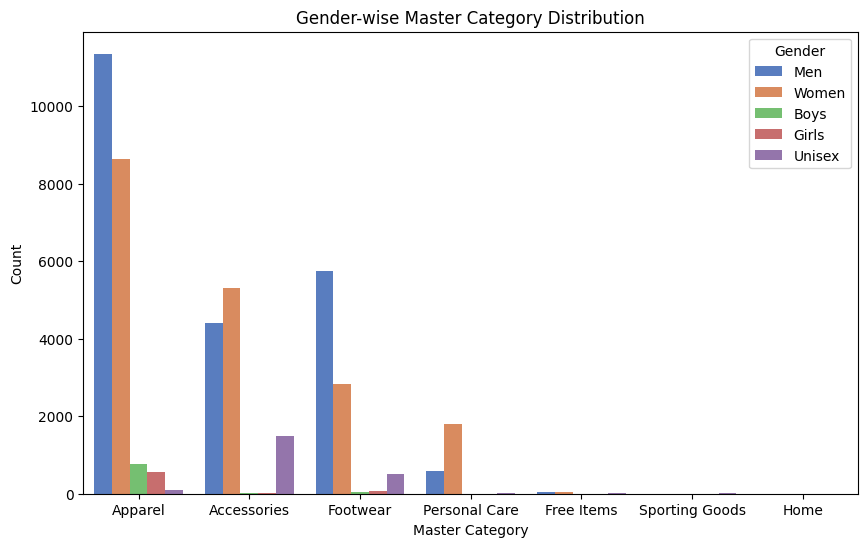

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='masterCategory', hue='gender', palette='muted')
plt.title('Gender-wise Master Category Distribution')
plt.xlabel('Master Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


In [ ]:
import os
import pandas as pd

# Paths
# Path to your CSV file
csv_file_path = "/content/ai_stylist_data/styles.csv"
# Path to your images folder
image_folder_path = "/content/ai_stylist_data/images"

# Step 1: Load the existing CSV, skip bad lines (rows with inconsistent columns)
try:
    df = pd.read_csv(csv_file_path, on_bad_lines='skip')
    print(f"CSV loaded successfully. Shape: {df.shape}")
except Exception as e:
    print(f"Error loading CSV: {e}")
    exit(1)

# Step 2: Get image filenames from the folder
image_files = [f for f in os.listdir(image_folder_path) if f.endswith('.jpg')]  # Only .jpg files

# Step 3: Ensure the filenames correspond to the image IDs (assuming 'id' in the image name corresponds to a row in the CSV)
image_ids = [f.split('.')[0] for f in image_files if f.split('.')[0].isdigit()]  # Only use numeric filenames

# Step 4: Map the image IDs to DataFrame and add them as a new column
# Assuming 'id' is a column in your CSV that can be matched with image filenames
df['imagePath'] = df['id'].astype(str).map(lambda x: f"{x}.jpg" if x in image_ids else None)

# Step 5: Save the updated CSV to the original file path
try:
    df.to_csv(csv_file_path, index=False)  # Save the updated DataFrame back to the same CSV file
    print(f"Updated CSV with 'imagePath' saved at: {csv_file_path}")
except Exception as e:
    print(f"Error saving the updated CSV: {e}")

CSV loaded successfully. Shape: (44424, 10)
Updated CSV with 'imagePath' saved at: /content/ai_stylist_data/styles.csv


In [ ]:
#after updating styles.csv first few rows
data=pd.read_csv("/content/ai_stylist_data/styles.csv",encoding='utf-8', on_bad_lines='skip')
df=pd.DataFrame(data)
df.head()


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,imagePath
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


In [ ]:
# columns
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName',
       'imagePath'],
      dtype='object')


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow import keras
import numpy as np
import pandas as pd
import os

# Image processing and model setup
img_width, img_height, chnl = 224, 224, 3  # Set image dimensions
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(img_width, img_height, chnl))
vgg.trainable = False
model1 = keras.Sequential([vgg, GlobalMaxPooling2D()])  # Use keras from tensorflow
model1.summary()

# Function to create image path
def img_path(img_name):
    return os.path.join("/content/ai_stylist_data/images", img_name)

# Function to get embeddings from the model
def model_predict(model, img_name):
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))  # Load image
    x = image.img_to_array(img)  # Convert image to array
    x = np.expand_dims(x, axis=0)  # Expand dimensions to match model input
    x = preprocess_input(x)  # Preprocess image input
    return model.predict(x).reshape(-1)  # Predict and reshape output

# Path to the embeddings file
embeddings_file_path = '/content/ai_stylist_data/embeddings_subset.csv'

# Check if the embeddings file already exists
if not os.path.exists(embeddings_file_path):
    print("Embeddings file not found, generating embeddings...")

    # Assuming the DataFrame `df` has a column named 'imagePath' with image filenames
    # Select the first 2,000 images from the DataFrame
    df_subset = df.head(2000)  # Process only the first 2,000 rows

    # Copy the subset to avoid modifying the original DataFrame
    df_copy_subset = df_subset.copy()

    # Generate embeddings for the subset of images
    df_embedding_subset = df_copy_subset['imagePath'].apply(lambda x: model_predict(model1, x))  # Apply model to each image

    # Convert the embeddings into a DataFrame
    df_embedding_subset = df_embedding_subset.apply(pd.Series)

    # Add embeddings to the copied subset DataFrame
    df_copy_subset = pd.concat([df_copy_subset, df_embedding_subset], axis=1)

    # Save the resulting DataFrame with embeddings for the first 2,000 images
    df_copy_subset.to_csv(embeddings_file_path, index=False)

    # Display the first few rows of the resulting DataFrame
    print(df_copy_subset.head())
else:
    print("Embeddings file already exists, skipping the embedding generation.")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 512)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Embeddings file not found, generating embeddings...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
# Display the first few rows of the resulting DataFrame
print(df_copy_subset.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  ...  \
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  ...   
1  2012.0  Casual             Peter England Men Party Blue Jeans  ...   
2  2016.0  Casual                       Titan Women Silver Watch  ...   
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  ...   
4  2012.0  Casual                          Puma Men Grey T-shirt  ...   

        502         503       504        505        506        507        508  \
0  0.000000

In [ ]:
import os

# Define the path to the embeddings file
embeddings_file_path = '/content/ai_stylist_data/embeddings_partial.csv'

# Check if the embeddings file already exists
if os.path.exists(embeddings_file_path):
    print(f"Embeddings file '{embeddings_file_path}' already exists. Skipping batch processing.")
else:
    # Define batch size and range for batch processing
    batch_size = 500  # Adjust based on speed and memory
    start = 2000      # Continue from previous progress
    end = 5000

    # Generate embeddings in batches and save to disk
    for i in range(start, end, batch_size):
        print(f"Processing images {i} to {i+batch_size}")
        df_batch = df.iloc[i:i+batch_size].copy()
        df_embedding_batch = df_batch['imagePath'].apply(lambda x: model_predict(model1, x))
        df_embedding_batch = df_embedding_batch.apply(pd.Series)
        df_batch = pd.concat([df_batch, df_embedding_batch], axis=1)

        # Append batch results to CSV
        df_batch.to_csv(embeddings_file_path, mode='a', header=not os.path.exists(embeddings_file_path), index=False)
        print(f"Saved embeddings for batch {i} to {i+batch_size}")


Processing images 2000 to 2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd

# Define the paths to the two CSV files
embeddings_file_1 = '/content/ai_stylist_data/embeddings_subset.csv'  # First 2000 images
embeddings_file_2 = '/content/ai_stylist_data/embeddings_partial.csv'  # Images 2000 to 5000

# Read both CSV files into DataFrames
df1 = pd.read_csv(embeddings_file_1)
df2 = pd.read_csv(embeddings_file_2)

# Merge the DataFrames by concatenating them vertically (appending rows)
merged_df = pd.concat([df1, df2], ignore_index=True)

# Define the path for the merged CSV file
merged_embeddings_file_path = '/content/ai_stylist_data/merged_embeddings.csv'

# Save the merged DataFrame to a new CSV file
merged_df.to_csv(merged_embeddings_file_path, index=False)

# Display the first few rows of the merged DataFrame
print(merged_df.head())

# Optionally, confirm the total number of rows
print(f"Total rows in the merged file: {len(merged_df)}")


      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  ...  \
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  ...   
1  2012.0  Casual             Peter England Men Party Blue Jeans  ...   
2  2016.0  Casual                       Titan Women Silver Watch  ...   
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  ...   
4  2012.0  Casual                          Puma Men Grey T-shirt  ...   

        502         503       504        505        506        507        508  \
0  0.000000

In [ ]:
merged_df.shape

(5000, 523)

In [ ]:
# print all columns in merged_df
print(merged_df.columns)

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName',
       ...
       '502', '503', '504', '505', '506', '507', '508', '509', '510', '511'],
      dtype='object', length=523)


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 523 entries, id to 511
dtypes: float64(513), int64(1), object(9)
memory usage: 20.0+ MB


In [ ]:
# all columns
merged_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,502,503,504,505,506,507,508,509,510,511
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,0.000000,23.615625,0.000000,6.146307,0.000000,25.237303,18.948944,0.000000,6.719710,0.000000
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,...,0.000000,64.777770,0.000000,21.648495,0.000000,20.778326,35.637466,0.000000,43.800877,7.511488
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,...,0.084442,0.000000,1.313998,0.000000,0.000000,25.405756,9.973016,0.000000,11.206230,0.000000
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,...,0.000000,137.025470,0.000000,9.216298,19.421844,14.997112,49.465960,1.890025,5.897563,0.753218
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,...,0.000000,54.992783,0.000000,2.899198,0.000000,18.610624,89.455830,0.000000,33.367150,0.000000


In [ ]:
# Extracting the embedding columns (502 to 511)
embedding_columns = [str(i) for i in range(502, 512)]  # Embedding columns from 502 to 511

# Extract embeddings as a NumPy array
embeddings = merged_df[embedding_columns].values

# Display the first few embeddings to verify
print(embeddings[:5])


[[0.0000000e+00 2.3615625e+01 0.0000000e+00 6.1463075e+00 0.0000000e+00
  2.5237303e+01 1.8948944e+01 0.0000000e+00 6.7197100e+00 0.0000000e+00]
 [0.0000000e+00 6.4777770e+01 0.0000000e+00 2.1648495e+01 0.0000000e+00
  2.0778326e+01 3.5637466e+01 0.0000000e+00 4.3800877e+01 7.5114880e+00]
 [8.4441720e-02 0.0000000e+00 1.3139983e+00 0.0000000e+00 0.0000000e+00
  2.5405756e+01 9.9730160e+00 0.0000000e+00 1.1206230e+01 0.0000000e+00]
 [0.0000000e+00 1.3702547e+02 0.0000000e+00 9.2162980e+00 1.9421844e+01
  1.4997112e+01 4.9465960e+01 1.8900253e+00 5.8975625e+00 7.5321760e-01]
 [0.0000000e+00 5.4992783e+01 0.0000000e+00 2.8991978e+00 0.0000000e+00
  1.8610624e+01 8.9455830e+01 0.0000000e+00 3.3367150e+01 0.0000000e+00]]


In [ ]:
# Print the column names to verify
print(merged_df.columns)


Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName',
       ...
       '502', '503', '504', '505', '506', '507', '508', '509', '510', '511'],
      dtype='object', length=523)


In [ ]:
merged_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,502,503,504,505,506,507,508,509,510,511
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,0.000000,23.615625,0.000000,6.146307,0.000000,25.237303,18.948944,0.000000,6.719710,0.000000
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,...,0.000000,64.777770,0.000000,21.648495,0.000000,20.778326,35.637466,0.000000,43.800877,7.511488
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,...,0.084442,0.000000,1.313998,0.000000,0.000000,25.405756,9.973016,0.000000,11.206230,0.000000
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,...,0.000000,137.025470,0.000000,9.216298,19.421844,14.997112,49.465960,1.890025,5.897563,0.753218
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,...,0.000000,54.992783,0.000000,2.899198,0.000000,18.610624,89.455830,0.000000,33.367150,0.000000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


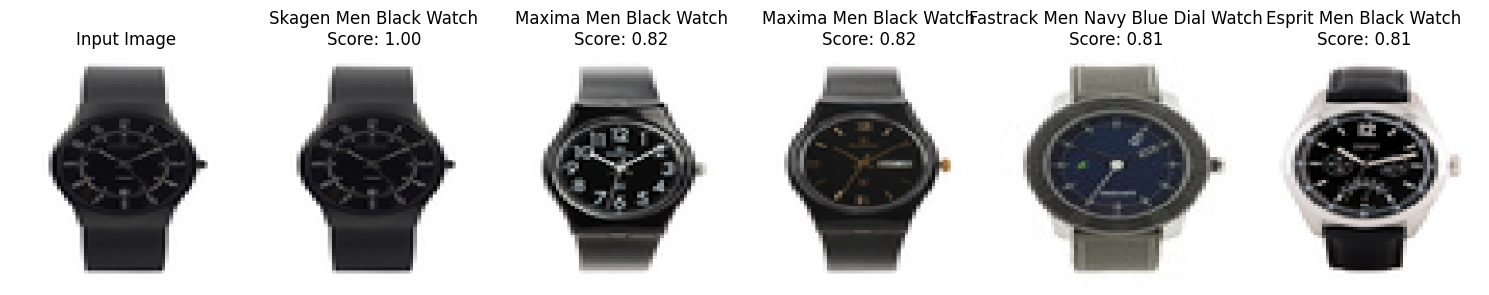

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity

# Load merged embeddings dataset
merged_embeddings_file_path = '/content/ai_stylist_data/merged_embeddings.csv'
df = pd.read_csv(merged_embeddings_file_path)

# Extract embeddings as a numpy array
embeddings = df.iloc[:, -512:].values  # Assuming embeddings are the last 512 columns

# Function to display images with product names and similarity scores
def display_recommendations(input_img_path, recommended_indices, scores):
    fig, axes = plt.subplots(1, len(recommended_indices) + 1, figsize=(15, 5))

    # Display input image
    img = image.load_img(input_img_path, target_size=(224, 224))
    axes[0].imshow(img)
    axes[0].set_title("Input Image")
    axes[0].axis('off')

    # Display recommended images
    for i, idx in enumerate(recommended_indices):
        rec_img_path = img_path(df.iloc[idx]['imagePath'])  # Get image path
        rec_img = image.load_img(rec_img_path, target_size=(224, 224))
        axes[i + 1].imshow(rec_img)
        axes[i + 1].set_title(f"{df.iloc[idx]['productDisplayName']}\nScore: {scores[i]:.2f}")
        axes[i + 1].axis('off')

    plt.tight_layout()
    plt.show()

# Function to recommend products based on embeddings
def recommend_products(input_img_name, top_n=5):
    # Get input image embedding
    input_embedding = model_predict(model1, input_img_name).reshape(1, -1)

    # Compute cosine similarity
    similarities = cosine_similarity(input_embedding, embeddings).flatten()

    # Get top N recommendations (excluding the input image itself if it's in the dataset)
    recommended_indices = np.argsort(similarities)[::-1][:top_n]
    recommended_scores = similarities[recommended_indices]

    # Display recommendations
    input_img_path = img_path(input_img_name)
    display_recommendations(input_img_path, recommended_indices, recommended_scores)

# Example usage
input_image_name = '30039.jpg'  # Replace with your image filename
recommend_products(input_image_name, top_n=5)


In [ ]:
import pandas as pd
import os
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
from tqdm import tqdm

# Load styles.csv
data = pd.read_csv("/content/ai_stylist_data/styles.csv", encoding='utf-8', on_bad_lines='skip')
df = pd.DataFrame(data)

# Add the full image path to the DataFrame
image_folder = "/content/ai_stylist_data/images/"  # Update this with the actual folder where images are stored
df['fullImagePath'] = df['imagePath'].apply(lambda x: os.path.join(image_folder, str(x)))

# Filter rows with valid image paths
df = df[df['fullImagePath'].apply(lambda x: os.path.isfile(x))]

# Select the first 5000 images
df = df.iloc[:5000]

# Load ResNet50 model (without top layers)
resnet50_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Function to process a batch of images and get embeddings
def process_batch(image_paths, model):
    embeddings = []
    for img_path in image_paths:
        try:
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            embedding = model.predict(img_array)
            embeddings.append(embedding.flatten())
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            embeddings.append(None)
    return embeddings

# Process images in batches
batch_size = 500
embeddings = []

for i in tqdm(range(0, len(df), batch_size)):
    batch_paths = df['fullImagePath'].iloc[i:i + batch_size].tolist()
    batch_embeddings = process_batch(batch_paths, resnet50_model)
    embeddings.extend(batch_embeddings)

# Add embeddings to DataFrame
df['embeddings'] = embeddings

# Drop rows where embedding is None
df = df[df['embeddings'].notnull()]

# Save embeddings to a CSV file for later use
embedding_data = df[['id', 'embeddings']]
embedding_data.to_csv('/content/ai_stylist_data/embeddings_resnet50_first_5000.csv', index=False)

print("Embeddings generated and saved successfully!")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━

 10%|█         | 1/10 [00:40<06:08, 40.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

 20%|██        | 2/10 [01:22<05:30, 41.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

 30%|███       | 3/10 [02:03<04:47, 41.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

 40%|████      | 4/10 [02:42<04:01, 40.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

 50%|█████     | 5/10 [03:20<03:17, 39.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

 60%|██████    | 6/10 [04:01<02:40, 40.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

 70%|███████   | 7/10 [04:42<02:00, 40.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

 80%|████████  | 8/10 [05:23<01:20, 40.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

 90%|█████████ | 9/10 [06:03<00:40, 40.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

100%|██████████| 10/10 [06:44<00:00, 40.46s/it]


Embeddings generated and saved successfully!


In [ ]:
# Example recommendation function
def recommend_similar_images(image_id, top_n=5):
    # Find the embedding of the query image
    query_embedding = df[df['id'] == image_id]['embeddings'].values[0]

    # Compute cosine similarity
    all_embeddings = np.stack(df['embeddings'].values)
    similarity_scores = cosine_similarity([query_embedding], all_embeddings).flatten()

    # Get top N similar images
    top_indices = similarity_scores.argsort()[-top_n-1:][::-1][1:]  # Exclude the query image itself
    similar_images = df.iloc[top_indices]

    # Display the images
    plt.figure(figsize=(15, 5))
    for i, (_, row) in enumerate(similar_images.iterrows()):
        img = image.load_img(row['fullImagePath'], target_size=(224, 224))
        plt.subplot(1, top_n, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Similarity: {similarity_scores[top_indices[i]]:.2f}")
    plt.show()

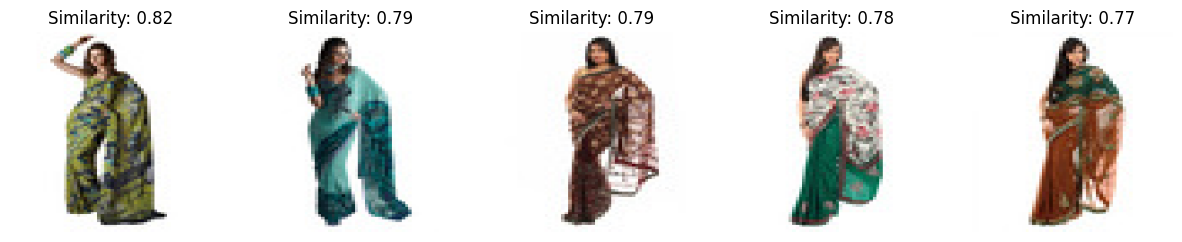

In [ ]:
# Test the recommendation function
test_image_id = 57958	 # Replace with an actual ID from the styles.csv
recommend_similar_images(test_image_id, top_n=5)
